In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kronsum
import timeit
from tqdm import tqdm

First derivative by X axis

Matrix size: (500, 500)
Time for loop laplacian:0.09 sec
Time for sparse laplacian:0.08 sec
Matrix size: (1000, 1000)
Time for loop laplacian:0.53 sec
Time for sparse laplacian:0.49 sec
Matrix size: (1500, 1500)
Time for loop laplacian:1.33 sec
Time for sparse laplacian:1.35 sec
Matrix size: (2000, 2000)
Time for loop laplacian:2.33 sec
Time for sparse laplacian:2.06 sec
Matrix size: (2500, 2500)
Time for loop laplacian:5.11 sec
Time for sparse laplacian:9.67 sec
Matrix size: (3000, 3000)
Time for loop laplacian:7.62 sec
Time for sparse laplacian:12.97 sec
Matrix size: (3500, 3500)
Time for loop laplacian:10.05 sec
Time for sparse laplacian:17.12 sec
Matrix size: (4000, 4000)
Time for loop laplacian:13.02 sec
Time for sparse laplacian:23.44 sec


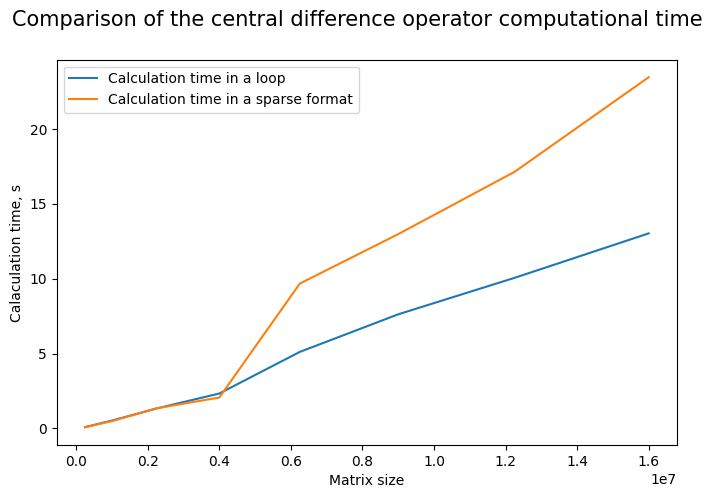

In [ ]:
def central_difference_x(f): #First order derivative df/dx: 2-points stencil
    diff = np.zeros_like(f)
    diff[1:-1, 1:-1] = (f[1:-1, 2:]-f[1:-1, 0:-2]) / (2 * element_length)
    return diff
def sparse_operator(f):
    diff = Central_diff_operator.dot(f)
    return diff

DOMAIN_SIZE = 1
element_length = 1
N = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
MatrixSizes = [n**2 for n in N]
times_loop = []
times_sparse = []
for n in N:

    print(f'Matrix size: {(n, n)}')
    A = np.random.random((n, n))

    Central_diff_operator = diags([-1, 1], [-1,  1], shape=(n**2, n**2), format='csr') / (2 * element_length)

    # Measure time for central difference calculation in loop
    loop_central_diff = timeit.timeit(lambda: central_difference_x(A), number=100)

    target_vector = A.flatten()
    # Measure time for central difference sparse scheme
    sparse_central_diff = timeit.timeit(lambda: sparse_operator(target_vector), number=100)

    print(f"Time for loop laplacian:{loop_central_diff:.2f} sec")
    print(f"Time for sparse laplacian:{sparse_central_diff:.2f} sec")

    times_loop.append(loop_central_diff)
    times_sparse.append(sparse_central_diff)

    # Check if the results are the same
    sparse_solution = sparse_operator(target_vector)
    sparse_solution = sparse_solution.reshape(n, n)
    sparse_solution[:, 0] = 0.0
    sparse_solution[0, :] = 0.0
    sparse_solution[-1, :] = 0.0
    sparse_solution[:, -1] = 0.0
    assert np.allclose(central_difference_x(A), sparse_solution, atol=1e-10)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(MatrixSizes, times_loop, label = "Calculation time in a loop")
ax.plot(MatrixSizes, times_sparse, label = "Calculation time in a sparse format")
ax.set_xlabel('Matrix size')
ax.set_ylabel('Calaculation time, s')
ax.legend()
fig.suptitle('Comparison of the central difference operator computational time', fontsize = 15)
fig.show()

First derivative by Y axis

Matrix size: (500, 500)
Time for loop laplacian:0.10 sec
Time for sparse laplacian:0.12 sec
Matrix size: (1000, 1000)
Time for loop laplacian:1.12 sec
Time for sparse laplacian:0.63 sec
Matrix size: (1500, 1500)
Time for loop laplacian:2.38 sec
Time for sparse laplacian:1.45 sec
Matrix size: (2000, 2000)
Time for loop laplacian:2.26 sec
Time for sparse laplacian:4.26 sec
Matrix size: (2500, 2500)
Time for loop laplacian:3.69 sec
Time for sparse laplacian:3.88 sec
Matrix size: (3000, 3000)
Time for loop laplacian:7.38 sec
Time for sparse laplacian:14.43 sec
Matrix size: (3500, 3500)
Time for loop laplacian:12.45 sec
Time for sparse laplacian:17.41 sec
Matrix size: (4000, 4000)
Time for loop laplacian:13.02 sec
Time for sparse laplacian:22.95 sec


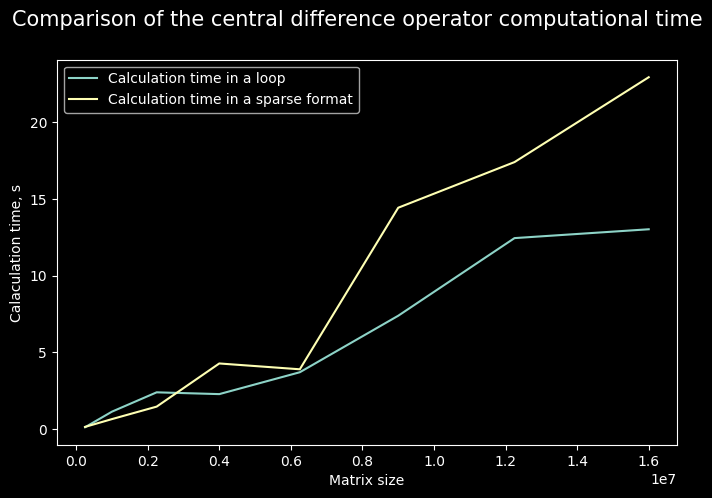

In [ ]:
def central_difference_y(f): #First order derivative df/dy: 2-points stencil
    diff = np.zeros_like(f)
    diff[1:-1, 1:-1] = (f[2:, 1:-1]-f[0:-2, 1:-1]) / (2 * element_length)
    return diff
def sparse_operator(f):
    diff = Central_diff_operator.dot(f)
    return diff

DOMAIN_SIZE = 1
element_length = 1
N = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
MatrixSizes = [n**2 for n in N]
times_loop = []
times_sparse = []
for n in N:

    print(f'Matrix size: {(n, n)}')
    A = np.random.random((n, n))

    Central_diff_operator = diags([-1, 1], [1,  -1], shape=(n**2, n**2), format='csr') / (2 * element_length)

    # Measure time for central difference calculation in loop
    loop_central_diff = timeit.timeit(lambda: central_difference_y(A), number=100)

    target_vector = A.T.flatten()
    # Measure time for central difference sparse scheme
    sparse_central_diff = timeit.timeit(lambda: sparse_operator(target_vector), number=100)

    print(f"Time for loop laplacian:{loop_central_diff:.2f} sec")
    print(f"Time for sparse laplacian:{sparse_central_diff:.2f} sec")

    times_loop.append(loop_central_diff)
    times_sparse.append(sparse_central_diff)

    # Check if the results are the same
    sparse_solution = sparse_operator(target_vector)
    sparse_solution = sparse_solution.reshape(n, n)
    sparse_solution[1:-1, 1:-1] = -sparse_solution[1:-1, 1:-1].T
    sparse_solution[:, 0] = 0.0
    sparse_solution[0, :] = 0.0
    sparse_solution[-1, :] = 0.0
    sparse_solution[:, -1] = 0.0
    assert np.allclose(central_difference_y(A), sparse_solution, atol=1e-10)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(MatrixSizes, times_loop, label = "Calculation time in a loop")
ax.plot(MatrixSizes, times_sparse, label = "Calculation time in a sparse format")
ax.set_xlabel('Matrix size')
ax.set_ylabel('Calaculation time, s')
ax.legend()
fig.suptitle('Comparison of the central difference operator computational time', fontsize = 15)
fig.show()

Sparse laplacian calculation

Matrix size: (500, 500)
Time for loop laplacian:0.21 sec
Time for sparse laplacian:0.18 sec
Matrix size: (1000, 1000)
Time for loop laplacian:1.13 sec
Time for sparse laplacian:1.01 sec
Matrix size: (1500, 1500)
Time for loop laplacian:5.77 sec
Time for sparse laplacian:1.97 sec
Matrix size: (2000, 2000)
Time for loop laplacian:6.33 sec
Time for sparse laplacian:4.14 sec
Matrix size: (2500, 2500)
Time for loop laplacian:10.56 sec
Time for sparse laplacian:13.75 sec
Matrix size: (3000, 3000)
Time for loop laplacian:18.42 sec
Time for sparse laplacian:16.53 sec
Matrix size: (3500, 3500)
Time for loop laplacian:20.47 sec
Time for sparse laplacian:22.31 sec
Matrix size: (4000, 4000)
Time for loop laplacian:26.73 sec
Time for sparse laplacian:29.16 sec


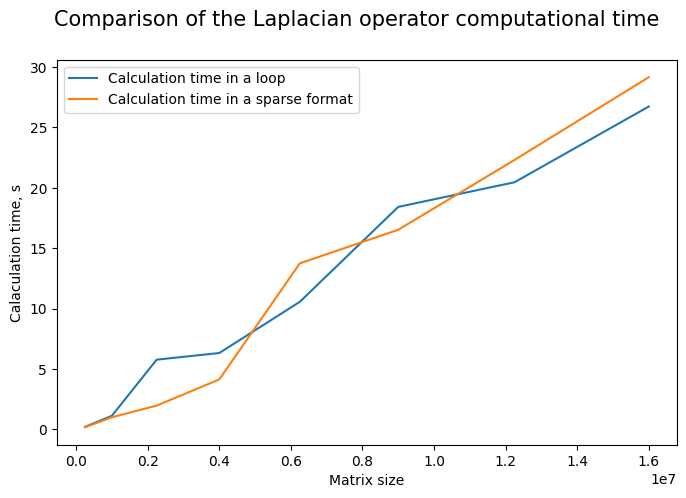

In [ ]:
def laplace(f):
    diff = np.zeros_like(f)
    diff[1:-1, 1:-1] = (f[1:-1, 0:-2] + f[0:-2, 1:-1] - 4 * f[1:-1, 1:-1] + f[1:-1, 2:] + f[2:, 1:-1]) / (element_length ** 2)
    return diff
def sparse_laplace(f):
    diff = Laplacian_operator.dot(f)
    return diff

DOMAIN_SIZE = 1
element_length = 1
N = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
MatrixSizes = [n**2 for n in N]
times_loop = []
times_sparse = []
for n in N:

    print(f'Matrix size: {(n, n)}')
    A = np.random.random((n, n))

    Dxx = diags([1, -2, 1], [-1, 0, 1], shape=(n, n), format='csr') / element_length**2
    Dyy = diags([1, -2, 1], [-1, 0, 1], shape=(n, n), format='csr') / element_length**2
    Laplacian_operator = kronsum(Dyy, Dxx)

    # Measure time for Laplacian calculation in loop
    loop_laplacian = timeit.timeit(lambda: laplace(A), number=100)

    target_vector = A.flatten()
    # Measure time for laplacian2
    sparse_laplacian = timeit.timeit(lambda: sparse_laplace(target_vector), number=100)

    print(f"Time for loop laplacian:{loop_laplacian:.2f} sec")
    print(f"Time for sparse laplacian:{sparse_laplacian:.2f} sec")

    times_loop.append(loop_laplacian)
    times_sparse.append(sparse_laplacian)

    # Check if the results are the same
    sparse_solution = sparse_laplace(target_vector)
    sparse_solution = sparse_solution.reshape(n, n)
    sparse_solution[:, 0] = 0.0
    sparse_solution[0, :] = 0.0
    sparse_solution[-1, :] = 0.0
    sparse_solution[:, -1] = 0.0
    assert np.allclose(laplace(A), sparse_solution, atol=1e-10)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(MatrixSizes, times_loop, label = "Calculation time in a loop")
ax.plot(MatrixSizes, times_sparse, label = "Calculation time in a sparse format")
ax.set_xlabel('Matrix size')
ax.set_ylabel('Calaculation time, s')
ax.legend()
fig.suptitle('Comparison of the Laplacian operator computational time', fontsize = 15)
fig.show()

In [ ]:
DOMAIN_SIZE = 1.0 #m
nu = 0.1 #nu=mu/rho - kinematic viscosity, m2/sec
rho = 1.0 #density, g/m3
mu = nu*rho
N_PRESSURE_POISSON_ITERATIONS = 50
C = 0.5 #CFL

#for force
G = 1 #momentum
r = 0.2 * DOMAIN_SIZE #force size
xp = 0.5 * DOMAIN_SIZE
yp = 0.5 * DOMAIN_SIZE

In [ ]:
def loop_Navier_Stokes_solution(N_POINTS, N_ITERATIONS):
    element_length = DOMAIN_SIZE / (N_POINTS - 1)
    x = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)
    y = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)

    dt = (0.5 * element_length**2 / nu)*C
    X, Y = np.meshgrid(x, y)

    def central_difference_x(f): #First order derivative df/dx: 2-points stencil
        diff = np.zeros_like(f)
        diff[1:-1, 1:-1] = (f[1:-1, 2:]-f[1:-1, 0:-2]) / (2 * element_length)
        return diff

    def central_difference_y(f): #First order derivative df/dy: 2-points stencil
        diff = np.zeros_like(f)
        diff[1:-1, 1:-1] = (f[2:, 1:-1]-f[0:-2, 1:-1]) / (2 * element_length)
        return diff

    def laplace(f): #Sum of second order derivatives: 5-points stencil
        diff = np.zeros_like(f)
        diff[1:-1, 1:-1] = (f[1:-1, 0:-2]+f[0:-2, 1:-1]-4*f[1:-1, 1:-1]+f[1:-1, 2:]+f[2:, 1:-1]) / (element_length**2)
        return diff

    def force(x, y):
      f = np.zeros((N_POINTS, N_POINTS))
      for ix, xv in enumerate(x):
        for iy, yv in enumerate(y):
          vexp=-1*((xv-xp)**2+(yv-yp**2))/r
          f[ix, iy]=G*np.exp(vexp)
      return f*dt

    F = force(x, y)


    maximum_possible_time_step_length = (0.5 * element_length**2 / nu) #CFL for heat transfer problem
    if dt > C * maximum_possible_time_step_length:
        raise RuntimeError("Stability is not guarenteed")

    u_prev = np.zeros_like(X)
    v_prev = np.zeros_like(X)
    p_prev = np.zeros_like(X)


    for _ in tqdm(range(N_ITERATIONS)):
        du_dx = central_difference_x(u_prev)
        du_dy = central_difference_y(u_prev)
        dv_dx = central_difference_x(v_prev)
        dv_dy = central_difference_y(v_prev)
        laplace_u = laplace(u_prev)
        laplace_v = laplace(v_prev)

        # Perform a tentative step by solving the momentum equation without the pressure gradient.
        # Euler method: df/dt = f_i-f_(i-1)/dt -> df/dt=x -> f_i=(f_i-1)+xdt
        u_tent = (u_prev + dt * (- (u_prev * du_dx + v_prev * du_dy) + nu * laplace_u +F))
        v_tent = (v_prev + dt * (- (u_prev * dv_dx + v_prev * dv_dy) + nu * laplace_v +F))

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top, which is prescribed
        u_tent[0, :] = -u_tent[1, :]
        u_tent[:, 0] = -u_tent[:, 1]
        u_tent[:, -1] = -u_tent[:, -2]
        u_tent[-1, :] = -u_tent[-2, :]
        v_tent[0, :] = -v_tent[1, :]
        v_tent[:, 0] = -v_tent[:, 1]
        v_tent[:, -1] = -v_tent[:, -2]
        v_tent[-1, :] = -v_tent[-2, :]


        du_tent_dx = central_difference_x(u_tent)
        dv_tent_dy = central_difference_y(v_tent)

        # Compute a pressure correction by solving the pressure-poisson equation
        rhs = (rho / dt * (du_tent_dx + dv_tent_dy))

        for _ in range(N_PRESSURE_POISSON_ITERATIONS):

            p_next = np.zeros_like(p_prev)
            p_next[1:-1, 1:-1] = 1/4 * (p_prev[1:-1, 0:-2]+p_prev[0:-2, 1:-1]+p_prev[1:-1, 2:]+p_prev[2:, 1:-1]
                                 - element_length**2 * rhs[1:-1, 1:-1] )

            # Pressure Boundary Conditions
            p_next[:, -1] = p_next[:, -2]
            p_next[0,  :] = p_next[1,  :]
            p_next[:,  0] = p_next[:,  1]
            p_next[-1, :] = p_next[-2, :]

            p_prev = p_next

        dp_next_dx = central_difference_x(p_next)
        dp_next_dy = central_difference_y(p_next)

        # Correct the velocities such that the fluid stays incompressible
        u_next = (u_tent - dt / rho * dp_next_dx)
        v_next = (v_tent - dt / rho * dp_next_dy)

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top, which is prescribed
        u_next[0, :] = -u_next[1, :]
        u_next[:, 0] = -u_next[:, 1]
        u_next[:, -1] = -u_next[:, -2]
        u_next[-1, :] = -u_next[-2, :]
        v_next[0, :] = -v_next[1, :]
        v_next[:, 0] = -v_next[:, 1]
        v_next[:, -1] = -v_next[:, -2]
        v_next[-1, :] = -v_next[-2, :]

        # Advance in time
        u_prev = u_next
        v_prev = v_next
        p_prev = p_next


    return X, Y, u_next, v_next, p_next

In [91]:
def sparse_Navier_Stokes_solution(N_POINTS, N_ITERATIONS):
    element_length = DOMAIN_SIZE / (N_POINTS - 1)
    x = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)
    y = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)

    dt = (0.5 * element_length**2 / nu)*C
    X, Y = np.meshgrid(x, y)


    def sparse_central_difference_x(f): #First order derivative df/dx: 2-points stencil
        return x_central_diff_operator.dot(A.flatten())

    def sparse_central_difference_y(f): #First order derivative df/dy: 2-points stencil
        return y_central_diff_operator.dot(A.T.flatten())

    def sparse_laplace(f): #Sum of second order derivatives: 5-points stencil
        return Laplacian_operator.dot(f)


    x_central_diff_operator = diags([-1, 1], [-1,  1], shape=(N_POINTS**2, N_POINTS**2), format='csr') / (2 * element_length)
    y_central_diff_operator = diags([-1, 1], [1,  -1], shape=(N_POINTS**2, N_POINTS**2), format='csr') / (2 * element_length)


    Dxx = diags([1, -2, 1], [-1, 0, 1], shape=(N_POINTS, N_POINTS), format='csr') / element_length**2
    Dyy = diags([1, -2, 1], [-1, 0, 1], shape=(N_POINTS, N_POINTS), format='csr') / element_length**2
    Laplacian_operator = kronsum(Dyy, Dxx)


    def force(x, y):
      f = np.zeros((N_POINTS, N_POINTS))
      for ix, xv in enumerate(x):
        for iy, yv in enumerate(y):
          vexp=-1*((xv-xp)**2+(yv-yp**2))/r
          f[ix, iy]=G*np.exp(vexp)
      return f*dt

    F = force(x, y)

    maximum_possible_time_step_length = (0.5 * element_length**2 / nu) #CFL for heat transfer problem
    if dt > C * maximum_possible_time_step_length:
        raise RuntimeError("Stability is not guarenteed")

    u_prev = np.zeros_like(X)
    v_prev = np.zeros_like(X)
    p_prev = np.zeros_like(X)


    for _ in tqdm(range(N_ITERATIONS)):
        du_dx = central_difference_x(u_prev)
        du_dx = du_dx.reshape(N_POINTS, N_POINTS)
        du_dx[:, 0] = 0.0
        du_dx[0, :] = 0.0
        du_dx[-1, :] = 0.0
        du_dx[:, -1] = 0.0

        du_dy = central_difference_y(u_prev)
        du_dy = du_dx.reshape(N_POINTS, N_POINTS)
        du_dy[1:-1, 1:-1] = -du_dy[1:-1, 1:-1].T
        du_dy[:, 0] = 0.0
        du_dy[0, :] = 0.0
        du_dy[-1, :] = 0.0
        du_dy[:, -1] = 0.0

        dv_dx = central_difference_x(v_prev)
        dv_dx = dv_dx.reshape(N_POINTS, N_POINTS)
        dv_dx[:, 0] = 0.0
        dv_dx[0, :] = 0.0
        dv_dx[-1, :] = 0.0
        dv_dx[:, -1] = 0.0

        dv_dy = central_difference_y(v_prev)
        dv_dy = dv_dy.reshape(N_POINTS, N_POINTS)
        dv_dy[1:-1, 1:-1] = -dv_dy[1:-1, 1:-1].T
        dv_dy[:, 0] = 0.0
        dv_dy[0, :] = 0.0
        dv_dy[-1, :] = 0.0
        dv_dy[:, -1] = 0.0

        laplace_u = laplace(u_prev)
        laplace_u = laplace_u.reshape(N_POINTS, N_POINTS)
        laplace_u[:, 0] = 0.0
        laplace_u[0, :] = 0.0
        laplace_u[-1, :] = 0.0
        laplace_u[:, -1] = 0.0

        laplace_v = laplace(v_prev)
        laplace_v = laplace_v.reshape(N_POINTS, N_POINTS)
        laplace_v[:, 0] = 0.0
        laplace_v[0, :] = 0.0
        laplace_v[-1, :] = 0.0
        laplace_v[:, -1] = 0.0


        # Perform a tentative step by solving the momentum equation without the pressure gradient.
        # Euler method: df/dt = f_i-f_(i-1)/dt -> df/dt=x -> f_i=(f_i-1)+xdt
        u_tent = (u_prev + dt * (- (u_prev * du_dx + v_prev * du_dy) + nu * laplace_u +F))
        v_tent = (v_prev + dt * (- (u_prev * dv_dx + v_prev * dv_dy) + nu * laplace_v +F))

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top, which is prescribed
        u_tent[0, :] = -u_tent[1, :]
        u_tent[:, 0] = -u_tent[:, 1]
        u_tent[:, -1] = -u_tent[:, -2]
        u_tent[-1, :] = -u_tent[-2, :]
        v_tent[0, :] = -v_tent[1, :]
        v_tent[:, 0] = -v_tent[:, 1]
        v_tent[:, -1] = -v_tent[:, -2]
        v_tent[-1, :] = -v_tent[-2, :]


        du_tent_dx = central_difference_x(u_tent)
        du_tent_dx = du_tent_dx.reshape(N_POINTS, N_POINTS)
        du_tent_dx[:, 0] = 0.0
        du_tent_dx[0, :] = 0.0
        du_tent_dx[-1, :] = 0.0
        du_tent_dx[:, -1] = 0.0

        dv_tent_dy = central_difference_y(v_tent)
        dv_tent_dy = dv_tent_dy.reshape(N_POINTS, N_POINTS)
        dv_tent_dy[1:-1, 1:-1] = -dv_tent_dy[1:-1, 1:-1].T
        dv_tent_dy[:, 0] = 0.0
        dv_tent_dy[0, :] = 0.0
        dv_tent_dy[-1, :] = 0.0
        dv_tent_dy[:, -1] = 0.0

        # Compute a pressure correction by solving the pressure-poisson equation
        rhs = (rho / dt * (du_tent_dx + dv_tent_dy))

        for _ in range(N_PRESSURE_POISSON_ITERATIONS):

            p_next = np.zeros_like(p_prev)
            p_next[1:-1, 1:-1] = 1/4 * (p_prev[1:-1, 0:-2]+p_prev[0:-2, 1:-1]+p_prev[1:-1, 2:]+p_prev[2:, 1:-1]
                                 - element_length**2 * rhs[1:-1, 1:-1] )

            # Pressure Boundary Conditions
            p_next[:, -1] = p_next[:, -2]
            p_next[0,  :] = p_next[1,  :]
            p_next[:,  0] = p_next[:,  1]
            p_next[-1, :] = p_next[-2, :]

            p_prev = p_next

        dp_next_dx = central_difference_x(p_next)
        dp_next_dx = dp_next_dx.reshape(N_POINTS, N_POINTS)
        dp_next_dx[:, 0] = 0.0
        dp_next_dx[0, :] = 0.0
        dp_next_dx[-1, :] = 0.0
        dp_next_dx[:, -1] = 0.0

        dp_next_dy = central_difference_y(p_next)
        dp_next_dy = dp_next_dy.reshape(N_POINTS, N_POINTS)
        dp_next_dy[:, 0] = 0.0
        dp_next_dy[0, :] = 0.0
        dp_next_dy[-1, :] = 0.0
        dp_next_dy[:, -1] = 0.0

        # Correct the velocities such that the fluid stays incompressible
        u_next = (u_tent - dt / rho * dp_next_dx)
        v_next = (v_tent - dt / rho * dp_next_dy)

        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top, which is prescribed
        u_next[0, :] = -u_next[1, :]
        u_next[:, 0] = -u_next[:, 1]
        u_next[:, -1] = -u_next[:, -2]
        u_next[-1, :] = -u_next[-2, :]
        v_next[0, :] = -v_next[1, :]
        v_next[:, 0] = -v_next[:, 1]
        v_next[:, -1] = -v_next[:, -2]
        v_next[-1, :] = -v_next[-2, :]

        # Advance in time
        u_prev = u_next
        v_prev = v_next
        p_prev = p_next


    return X, Y, u_next, v_next, p_next


In [ ]:
loop_64_Navier_Stokes_time = timeit.timeit(lambda: loop_Navier_Stokes_solution(64, 500), number=10)
loop_128_Navier_Stokes_time = timeit.timeit(lambda: loop_Navier_Stokes_solution(128, 5000), number=10)

100%|██████████| 5000/5000 [00:41<00:00, 119.41it/s]


In [ ]:
loop_64_Navier_Stokes_time

17.495265024001128

In [ ]:
loop_128_Navier_Stokes_time

473.9037130309989

In [92]:
sparse_64_Navier_Stokes_time = timeit.timeit(lambda: sparse_Navier_Stokes_solution(64, 500), number=10)
sparse_128_Navier_Stokes_time = timeit.timeit(lambda: sparse_Navier_Stokes_solution(128, 5000), number=10)

100%|██████████| 5000/5000 [01:14<00:00, 67.50it/s]


In [93]:
sparse_64_Navier_Stokes_time

31.330206385002384

In [ ]:
def visualize(X, Y, u_next, v_next, p_next):
  plt.style.use("dark_background")
  plt.figure()
  plt.contourf(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], cmap="coolwarm")
  plt.colorbar()

  plt.quiver(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
  # plt.streamplot(X[::2, ::2], Y[::2, ::2], u_next[::2, ::2], v_next[::2, ::2], color="black")
  plt.xlim((0, 1))
  plt.ylim((0, 1))
  plt.show()


100%|██████████| 500/500 [00:01<00:00, 294.93it/s]


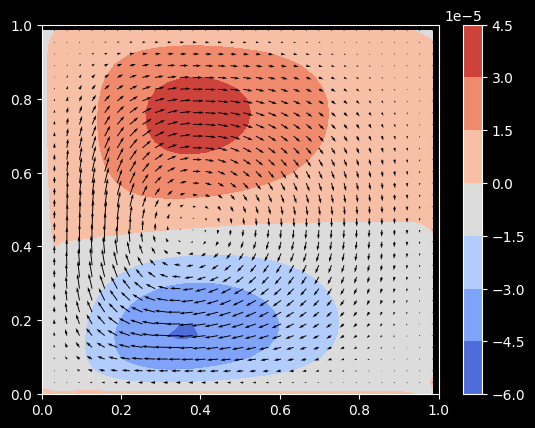

In [ ]:
loop_sol = [*loop_Navier_Stokes_solution(64, 500)]
visualize(*loop_sol)

<ipython-input-104-6c8b5cd82a0b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


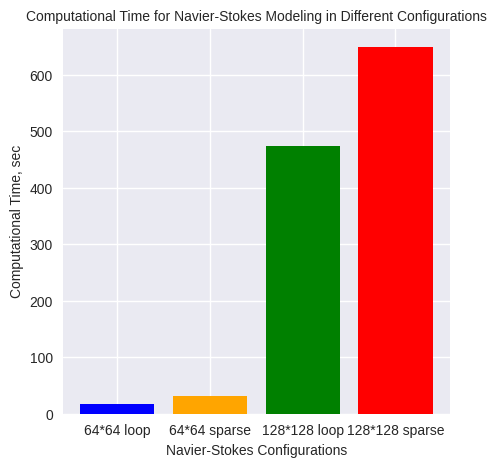

In [104]:
import matplotlib.pyplot as plt

# Set the style to a lighter theme (e.g., 'seaborn')
plt.style.use('seaborn')

# Data
columns = ["64*64 loop", "64*64 sparse", "128*128 loop", "128*128 sparse"]
computational_times = [17.495, 31.33, 473.904, 648.55]

# Create a bar histogram with increased font size and adjusted figure size
plt.figure(figsize=(5, 5))
plt.bar(columns, computational_times, color=['blue', 'orange', 'green', 'red'])

# Set labels and title with increased font size
plt.xlabel('Navier-Stokes Configurations', fontsize=10)
plt.ylabel('Computational Time, sec', fontsize=10)
plt.title('Computational Time for Navier-Stokes Modeling in Different Configurations', fontsize=10)

# Display the plot
plt.show()
